# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

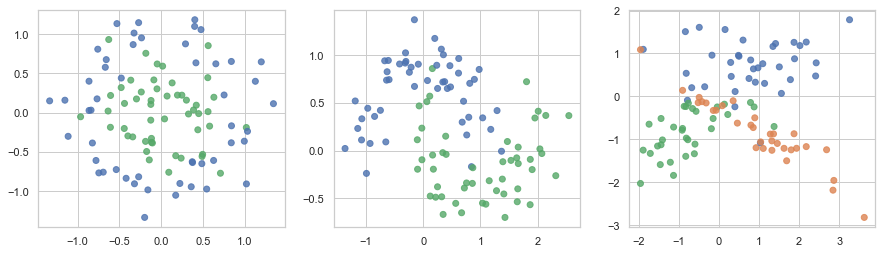

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y, on_subplots=False, pos=None, sz=None):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if on_subplots:
        plt.subplot2grid(sz, pos)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

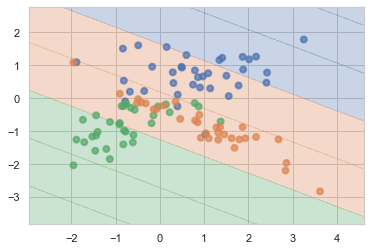

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

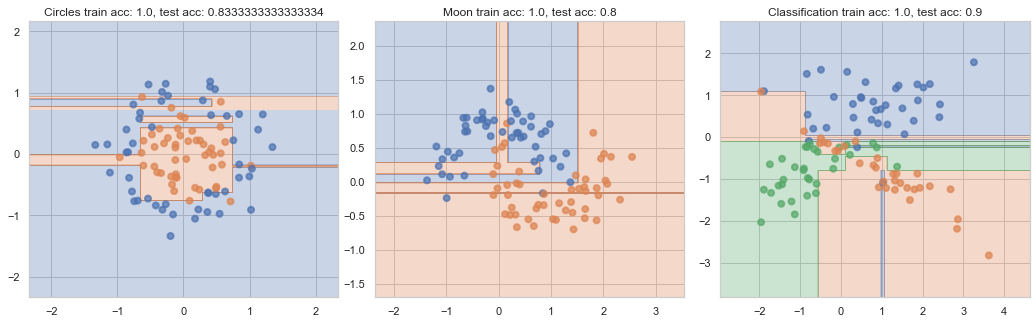

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import accuracy_score

datasets_names = ['Circles', 'Moon', 'Classification']

plt.figure(figsize=(15, 5))
for (i, (X, y)), name in zip(enumerate(datasets), datasets_names):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)


    classifier = DecisionTreeClassifier(random_state=777).fit(X_train, y_train)
    train_acc = accuracy_score(y_train, classifier.predict(X_train))
    test_acc = accuracy_score(y_test, classifier.predict(X_test))

    plt.subplot(1, 3, i + 1)
    plot_surface(classifier, X, y)
    plt.title(f'{name} train acc: {train_acc}, test acc: {test_acc}')

__Ответ:__ классификатор сильно переобучился, много тонких полосок. плоскость разделена на много маленьких частей сложной структурой.


__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

---
dataset: Circles


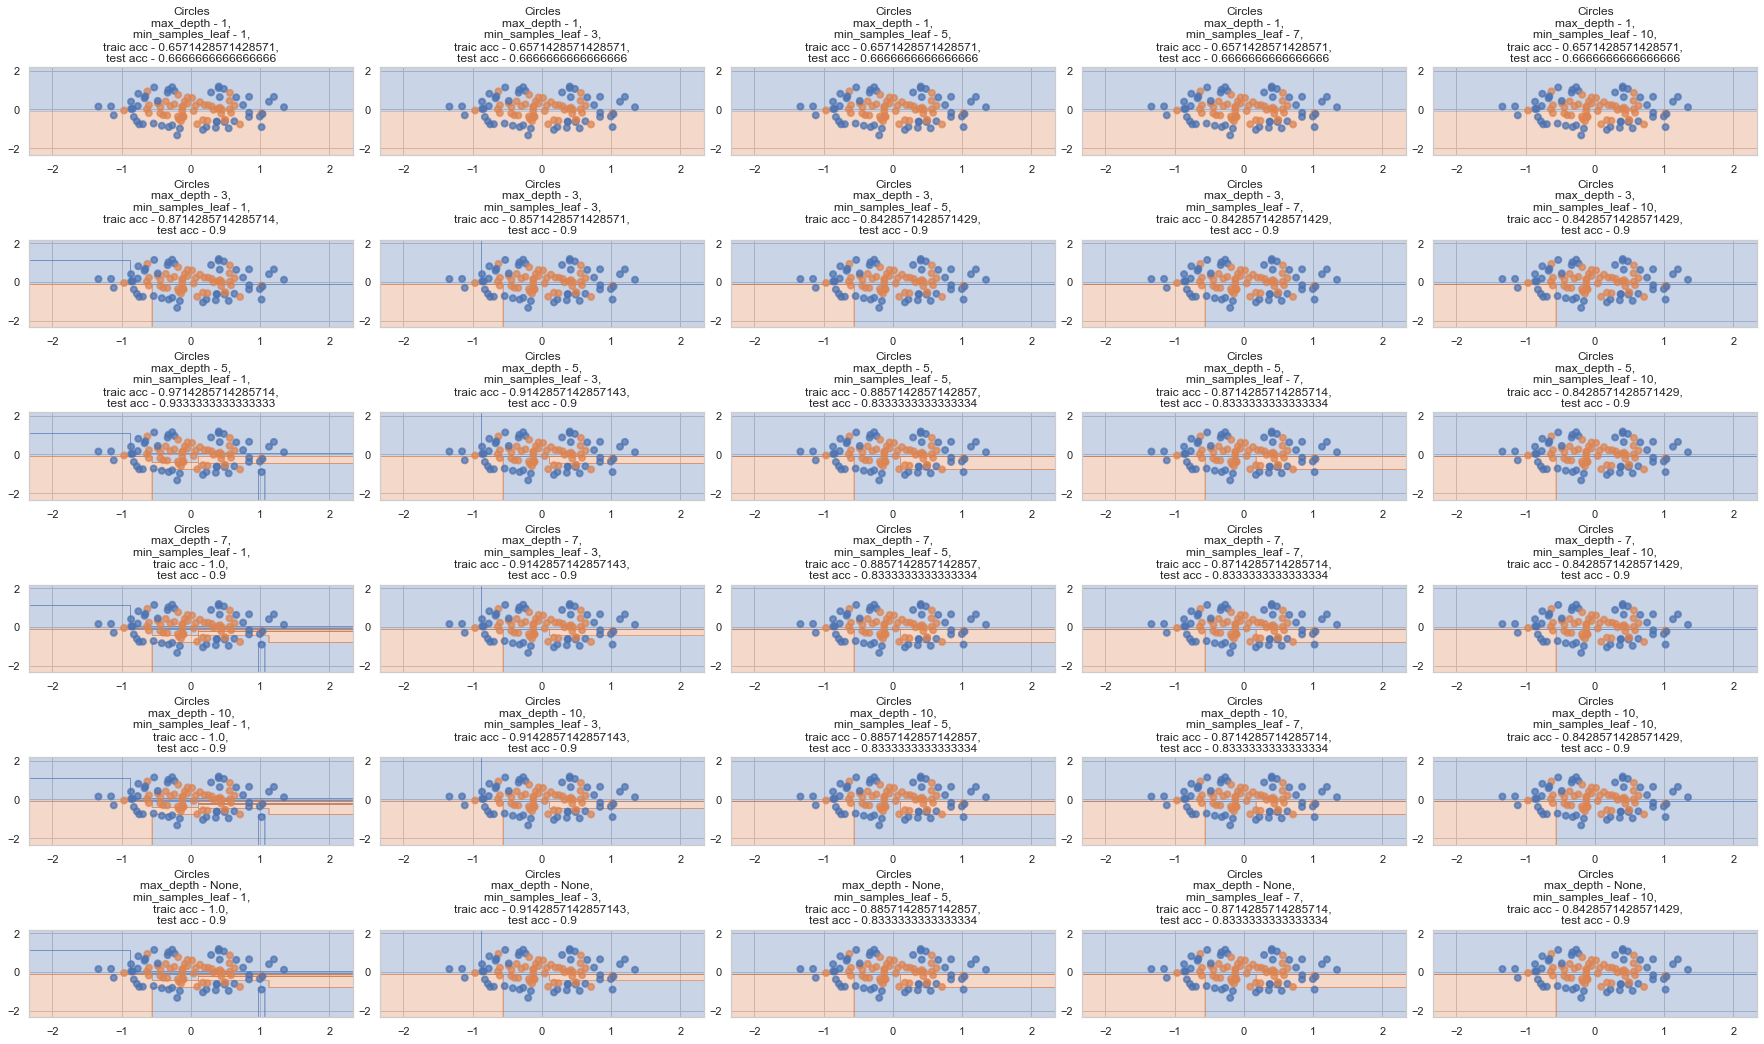

---
dataset: Moon


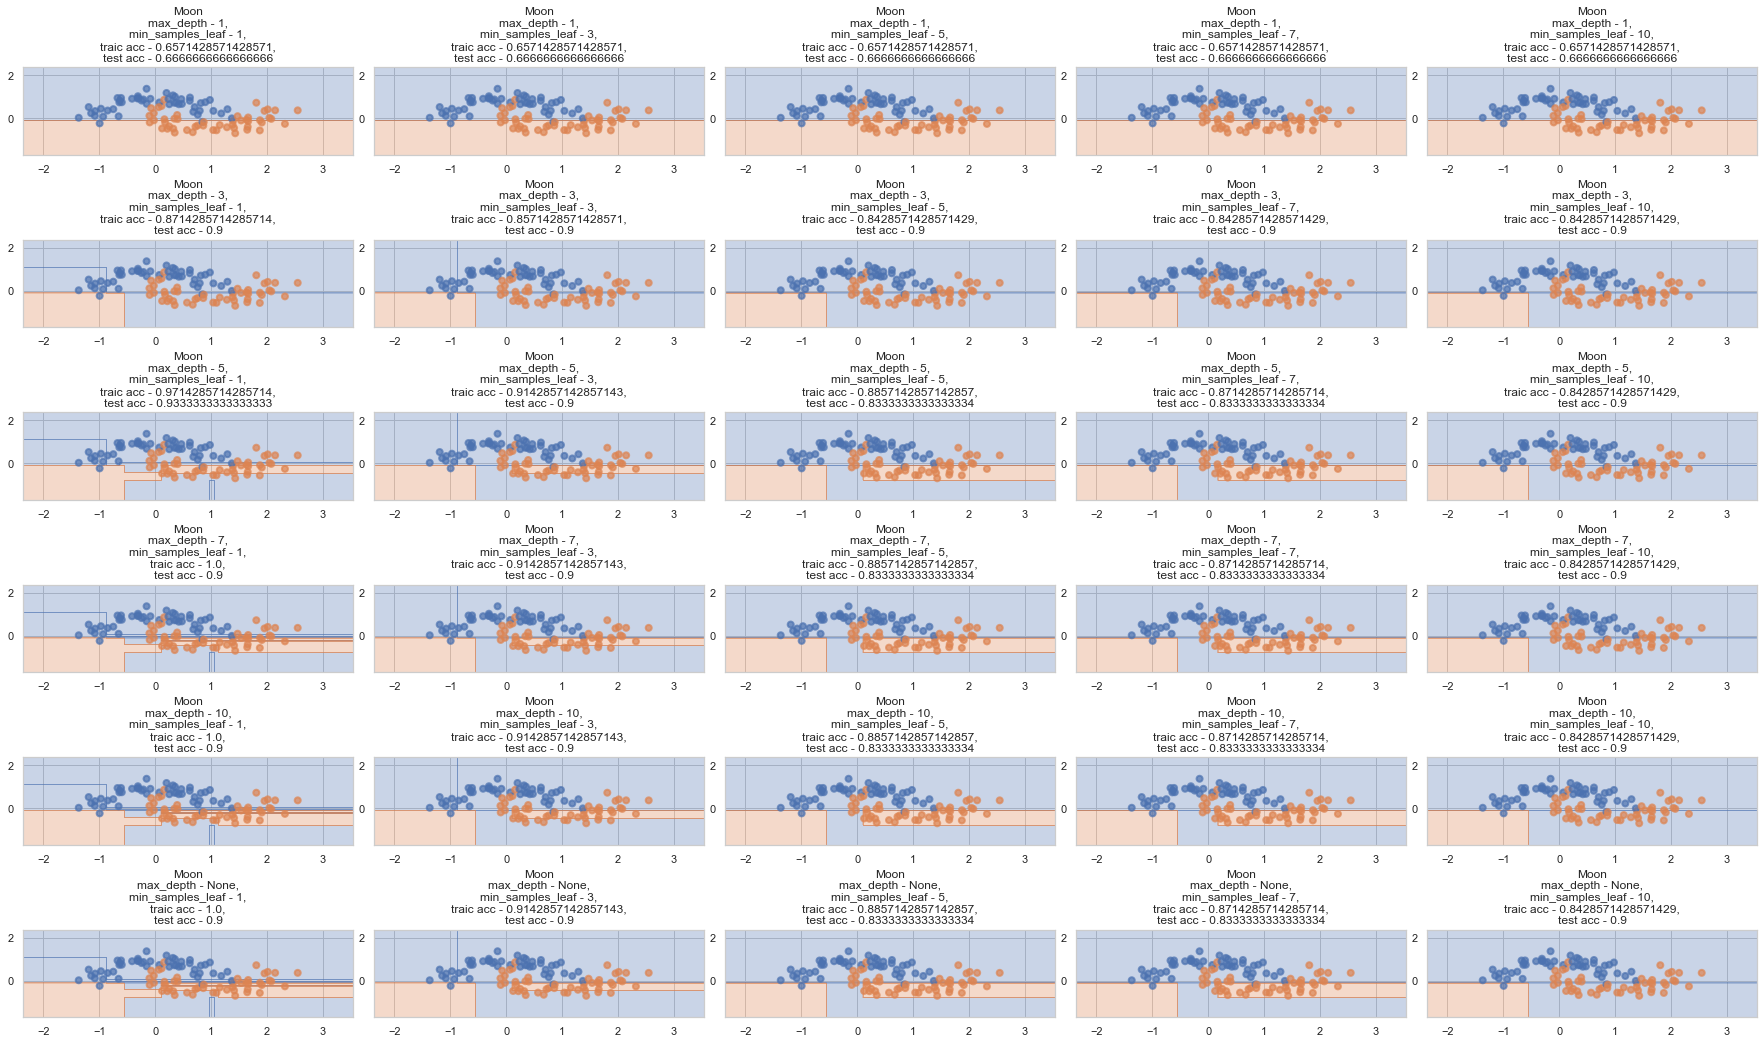

---
dataset: Classification


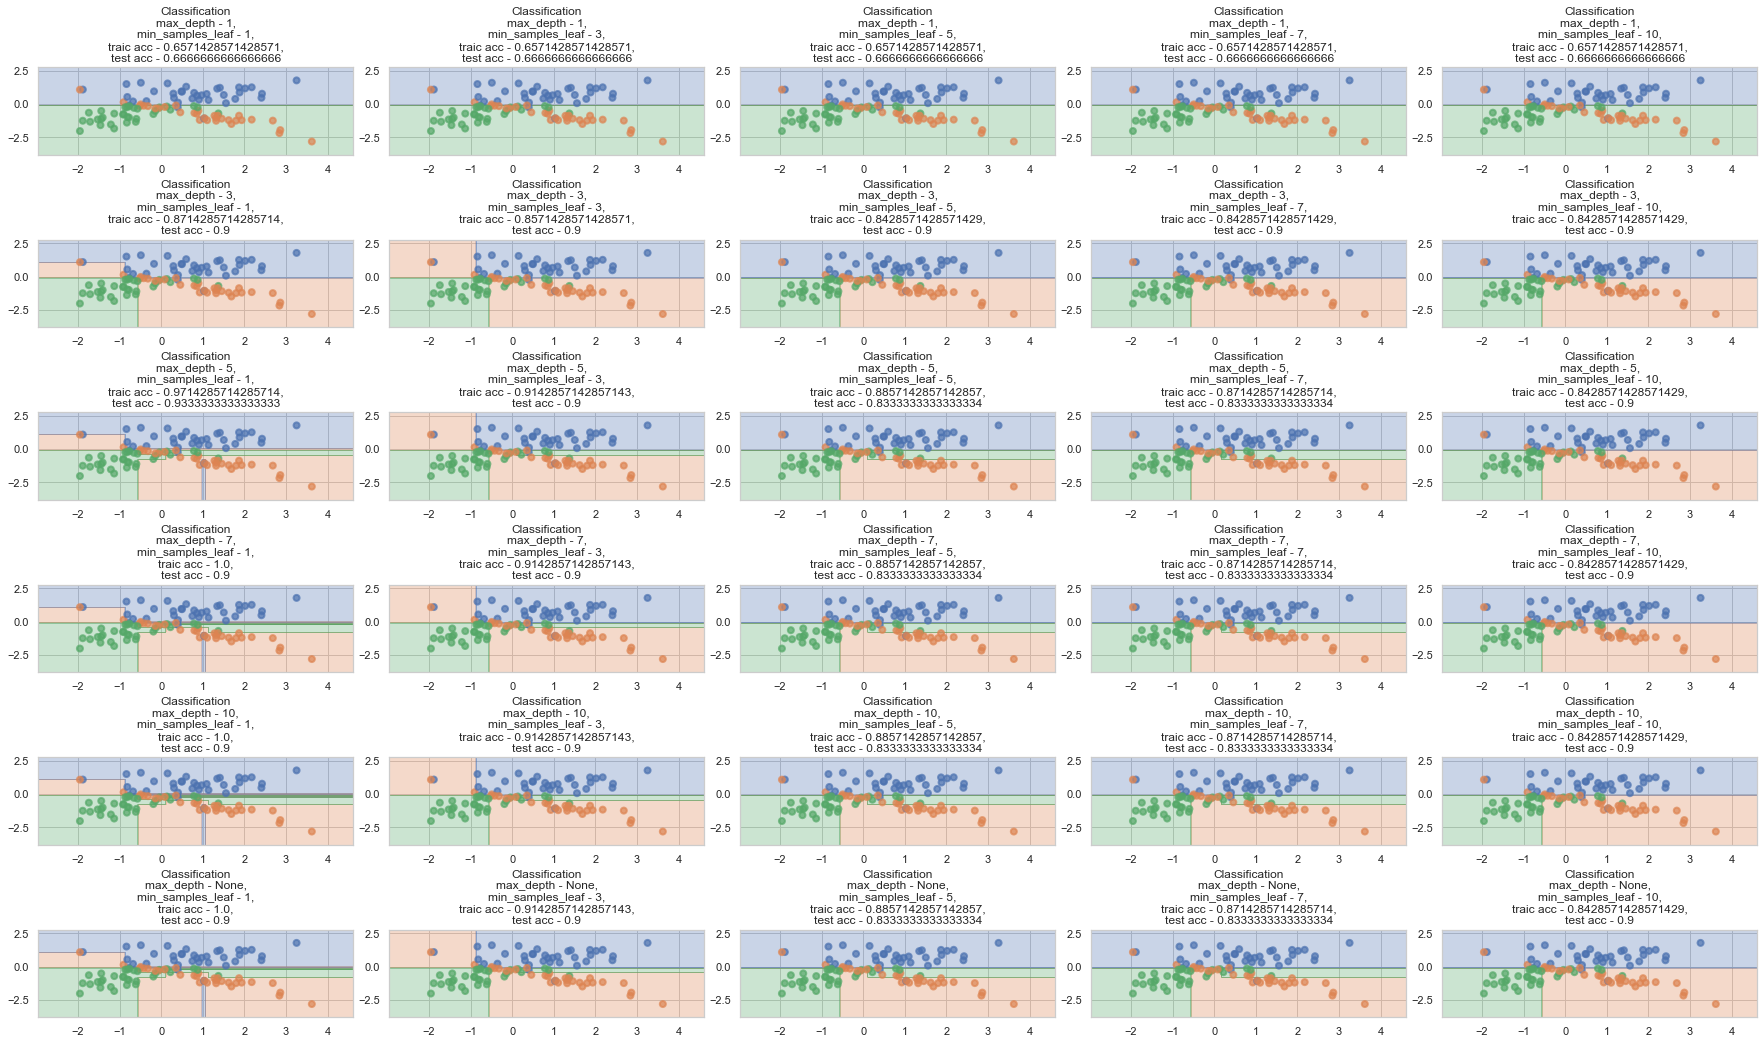

In [8]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

DEPTHS = [int(i) for i in np.linspace(1, 10, num=5)] + [None]
LEAVES = [int(i) for i in np.linspace(1, 10, num=5)]

def plot_tree(X, y, name):
    plt.figure(figsize=(25, 15))
    for i, cur_max_depth in enumerate(DEPTHS):
        for j, cur_min_samples_leaf in enumerate(LEAVES):
            classifier = DecisionTreeClassifier(max_depth=cur_max_depth, min_samples_leaf=cur_min_samples_leaf, random_state=777).fit(X_train, y_train)
            train_acc = accuracy_score(y_train, classifier.predict(X_train))
            test_acc = accuracy_score(y_test, classifier.predict(X_test))

            plot_surface(classifier, X, y, True, (i, j), (6, 5))

            plt.title(f"{name}\nmax_depth - {cur_max_depth},\nmin_samples_leaf - {cur_min_samples_leaf},\ntraic acc - {train_acc},\ntest acc - {test_acc}")
    plt.show()


for (i, (X, y)), name in zip(enumerate(datasets), datasets_names):
    print('---')
    print(f'dataset: {name}')
    plot_tree(X, y, name)


__Ответ:__

- Чем больше глубина и чем меньше минимальное число вершин в листе, тем сложнее дерево и тем больше оно теряет обобщающую способность.
- Для деревьев с небольшой глубиной и большим минимальным значением плохое качество




# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

https://contest.yandex.ru/contest/56884/run-report/102507795/

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = pd.read_csv('data/students.csv')
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


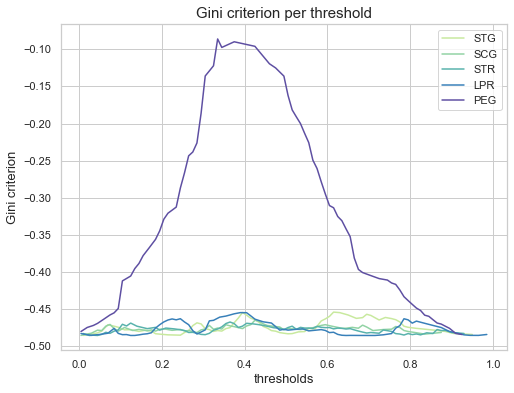

In [10]:
from hw5code import find_best_split

X, y = data.drop(columns='UNS'), data['UNS']


fig, ax = plt.subplots(figsize=(8, 6))
ax.set_prop_cycle(color=plt.cm.Spectral(np.linspace(0.65, 1, len(X.columns))))
ax.set_title('Gini criterion per threshold', fontsize=15)
ax.set_xlabel('thresholds', fontsize=13)
ax.set_ylabel('Gini criterion', fontsize=13)
for feature in X.columns:
    thresholds, ginis, best_threshold, best_gini = find_best_split(X[feature], y)
    ax.plot(thresholds, ginis, label=feature)
ax.legend()
plt.show()

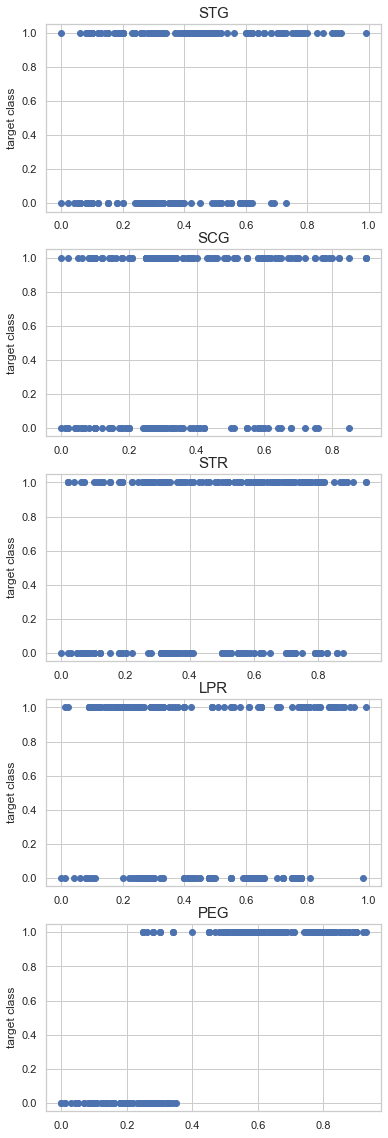

In [11]:
fig, axs = plt.subplots(5, 1, figsize=(6, 20))
for i, feature in enumerate(X.columns):
    axs[i].scatter(X[feature], y)
    axs[i].set_ylabel('target class')
    axs[i].set_title(feature, fontsize=15)

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** По графикам видно что разделять по `PEG`

- на графике с кривыми сначала возрастает потом убывает, причем ярковыраженно, в отличие от остальных кривых
- На графиках с точками ярко видно разделение на 2 класса.

Результаты согласуются

Охарактеризовать хорошие признаки можно наличием ярковыроженного экстремума

Кривые признаков, по которым невозможно делить же близки к относительно константным прямым

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».


https://contest.yandex.ru/contest/56884/run-report/102513028/

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score

data = pd.read_csv('data/agaricus-lepiota.data')
data.head()


,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [13]:
data = data.apply(LabelEncoder().fit_transform)
X, y = data.drop(columns='p'), data['p']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.5, random_state=42)

data.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [14]:
from hw5code import DecisionTree as myDecisionTree

tree = myDecisionTree(['categorical'] * X.shape[1])
tree.fit(X_train, y_train)
train_pred = tree.predict(X_train)
test_pred = tree.predict(X_test)

In [15]:
print(f'train accuracy: {accuracy_score(y_train, train_pred)}, test accuracy: {accuracy_score(y_test, test_pred)}')

train accuracy: 1.0, test accuracy: 1.0


In [16]:
len(tree._tree), data.shape

(5, (8123, 23))

по высоте дерева не кажется, что оно подстроилось под каждый объект

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [17]:
# mushrooms dataset
mushrooms = pd.read_csv('data/agaricus-lepiota.data').apply(LabelEncoder().fit_transform)

# tic-tac-toe dataset
tic_tac_toe = pd.read_csv('data/tic-tac-toe-endgame.csv')
tic_tac_toe.replace({'V10': {'positive': 1, 'negative': 0}}, inplace=True)
tic_tac_toe = tic_tac_toe.apply(LabelEncoder().fit_transform)

# cars dataset
cars = pd.read_csv('data/car.data')
cars.replace({'unacc': {'unacc': 0, 'acc': 0,
                        'good' : 1, 'vgood': 1}}, inplace=True)
cars_target = LabelEncoder().fit_transform(cars['unacc'])
cars = OrdinalEncoder().fit_transform(cars.drop(columns='unacc').astype('str'))

# nursery dataset
nursery = pd.read_csv('data/nursery.data')
nursery.replace({'recommend': {'not_recom': 0, 'recommend' : 0,
                               'very_recom': 1, 'priority': 1, 'spec_prior': 1}}, inplace=True)
nursery = nursery.apply(LabelEncoder().fit_transform)

datasets = {
    'mushrooms' : (mushrooms.drop(columns='p').values, mushrooms['p'].values),
    'tic-tac-toe' : (tic_tac_toe.drop(columns='V10').values, tic_tac_toe['V10'].values),
    'cars' : (cars, cars_target),
    'nursery' : (nursery.drop(columns='recommend').values, nursery['recommend'].values)
}

In [22]:
stats = {'mushrooms': {}, 'tic-tac-toe': {}, 'cars': {}, 'nursery': {}}


In [19]:
from sklearn.metrics import make_scorer
scorer = make_scorer(accuracy_score)

All real

In [23]:
from sklearn.model_selection import cross_val_score

for dataset_name, (X, y) in datasets.items():
    classifier = myDecisionTree(['real'] * X.shape[1])
    score = cross_val_score(classifier, X, y, scoring=scorer, cv=10).mean()
    print(f'Dataset: {dataset_name}, accuracy: {score}')
    stats[dataset_name]['all_real'] = score


Dataset: mushrooms, accuracy: 0.9992610837438424
Dataset: tic-tac-toe, accuracy: 0.4675328947368421
Dataset: cars, accuracy: 0.9425998118026616
Dataset: nursery, accuracy: 0.9998456790123458


All categorical

In [24]:

for dataset_name, (X, y) in datasets.items():
    classifier = myDecisionTree(['categorical'] * X.shape[1])
    score = cross_val_score(classifier, X, y, scoring=scorer, cv=10).mean()
    print(f'Dataset: {dataset_name}, accuracy: {score}')
    stats[dataset_name]['all_categorical'] = score


Dataset: mushrooms, accuracy: 1.0
Dataset: tic-tac-toe, accuracy: 0.5414583333333333
Dataset: cars, accuracy: 0.9675191558005108
Dataset: nursery, accuracy: 0.9999228395061728


All real + Ohe

In [25]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

for dataset_name, (X, y) in datasets.items():
    X_encoded = ohe.fit_transform(X)
    classifier = myDecisionTree(['real'] * X_encoded.shape[1])
    score = cross_val_score(classifier, X, y, scoring=scorer, cv=10).mean()
    print(f'Dataset: {dataset_name}, accuracy: {score}')
    stats[dataset_name]['all_real_ohe'] = score



Dataset: mushrooms, accuracy: 0.9992610837438424
Dataset: tic-tac-toe, accuracy: 0.4675328947368421
Dataset: cars, accuracy: 0.9425998118026616
Dataset: nursery, accuracy: 0.9998456790123458


DecisionTreeClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

for dataset_name, (X, y) in datasets.items():
    classifier = DecisionTreeClassifier()
    score = cross_val_score(classifier, X, y, scoring=scorer, cv=10).mean()
    print(f'Dataset: {dataset_name}, accuracy: {score}')
    stats[dataset_name]['DecisionTreeClassifier'] = score



Dataset: mushrooms, accuracy: 0.9627233562976023
Dataset: tic-tac-toe, accuracy: 0.7654605263157894
Dataset: cars, accuracy: 0.9443708831832234
Dataset: nursery, accuracy: 0.9998456790123458


In [31]:
for dataset_name, stats_for_dataset in stats.items():
    print(dataset_name)
    for key, value in stats_for_dataset.items():
        print(f'{key}: {value},')
    print('---')

mushrooms
all_real: 0.9992610837438424,
all_categorical: 1.0,
all_real_ohe: 0.9992610837438424,
DecisionTreeClassifier: 0.9627233562976023,
---
tic-tac-toe
all_real: 0.4675328947368421,
all_categorical: 0.5414583333333333,
all_real_ohe: 0.4675328947368421,
DecisionTreeClassifier: 0.7654605263157894,
---
cars
all_real: 0.9425998118026616,
all_categorical: 0.9675191558005108,
all_real_ohe: 0.9425998118026616,
DecisionTreeClassifier: 0.9443708831832234,
---
nursery
all_real: 0.9998456790123458,
all_categorical: 0.9999228395061728,
all_real_ohe: 0.9998456790123458,
DecisionTreeClassifier: 0.9998456790123458,
---


In [36]:
stats

{'mushrooms': {'all_real': 0.9992610837438424,
  'all_categorical': 1.0,
  'all_real_ohe': 0.9992610837438424,
  'DecisionTreeClassifier': 0.9627233562976023},
 'tic-tac-toe': {'all_real': 0.4675328947368421,
  'all_categorical': 0.5414583333333333,
  'all_real_ohe': 0.4675328947368421,
  'DecisionTreeClassifier': 0.7654605263157894},
 'cars': {'all_real': 0.9425998118026616,
  'all_categorical': 0.9675191558005108,
  'all_real_ohe': 0.9425998118026616,
  'DecisionTreeClassifier': 0.9443708831832234},
 'nursery': {'all_real': 0.9998456790123458,
  'all_categorical': 0.9999228395061728,
  'all_real_ohe': 0.9998456790123458,
  'DecisionTreeClassifier': 0.9998456790123458}}

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

In [37]:
stats_table = pd.DataFrame.from_dict(stats, orient='index')
stats_table

,all_real,all_categorical,all_real_ohe,DecisionTreeClassifier
mushrooms,0.999261,1.000000,0.999261,0.962723
tic-tac-toe,0.467533,0.541458,0.467533,0.765461
cars,0.942600,0.967519,0.942600,0.944371
nursery,0.999846,0.999923,0.999846,0.999846


In [38]:
stats_table.idxmax(axis=1)

mushrooms             all_categorical
tic-tac-toe    DecisionTreeClassifier
cars                  all_categorical
nursery               all_categorical
dtype: object

In [39]:
stats_table.idxmin(axis=1)

mushrooms      DecisionTreeClassifier
tic-tac-toe                  all_real
cars                         all_real
nursery                      all_real
dtype: object

In [40]:
stats_table.values.argsort(axis=1)

array([[3, 0, 2, 1],
       [0, 2, 1, 3],
       [0, 2, 3, 1],
       [0, 2, 3, 1]])

**Ответ:**

- Для разных датасетов алгоритмы ранжируются по-разному
- Для всех кроме tic-tac-toe лучше всего работает алгоритм с интерпретацией категориальных

- Это происходит из-за различий в датасетах - например в tic-tac-toe для выигрыша важны комбинации - точность была бы лучше если бы мы добавили инфу о взаимном расположениии крестиков-ноликов
- Думаю что роль случайности минимальна - тк используем кроссвалидацию и алгоритма построения дерева.


Вставьте что угодно, описывающее ваши впечатления от этого задания: